In [1]:
import sys
import os

In [2]:
# GLOBALS
save_to = 'test'
generated_images_directory = 'datasets/' + save_t

In [3]:
os.chdir('..')

---
## Generate 4-digit CAPTCHAs 

In [4]:
!python3 captcha-generator.py -i 1 -l 4 -t SIMPLE -d test

--------------------------------------
GENERATING CAPTCHA IMAGES

Unique values: 10000
CAPTCHA character length: 4
Iterations: 1
Total number of samples: 10000

Saving to: datasets/test/
--------------------------------------
100%|████████████████████████████████████| 10000/10000 [00:15<00:00, 627.37it/s]


In [5]:
!python3 captcha-generator.py -i 2 -l 4 -t COMPLEX -d test

--------------------------------------
GENERATING CAPTCHA IMAGES

Unique values: 10000
CAPTCHA character length: 4
Iterations: 2
Total number of samples: 20000

Saving to: datasets/test/
--------------------------------------
100%|████████████████████████████████████| 20000/20000 [03:01<00:00, 110.46it/s]


---
## Show some sample CAPTCHAs

In [6]:
import os
import cv2

def load_images_from_folder(foldername):
    images = []
    for filename in os.listdir(foldername):
        img = cv2.imread(os.path.join(foldername, filename))
        if img is not None:
            images.append(img)
    return images

img_list=load_images_from_folder(generated_images_directory)

/tmp/ipykernel_18006/867191831.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(img_list[i]) / columns + 1, columns, i + 1)


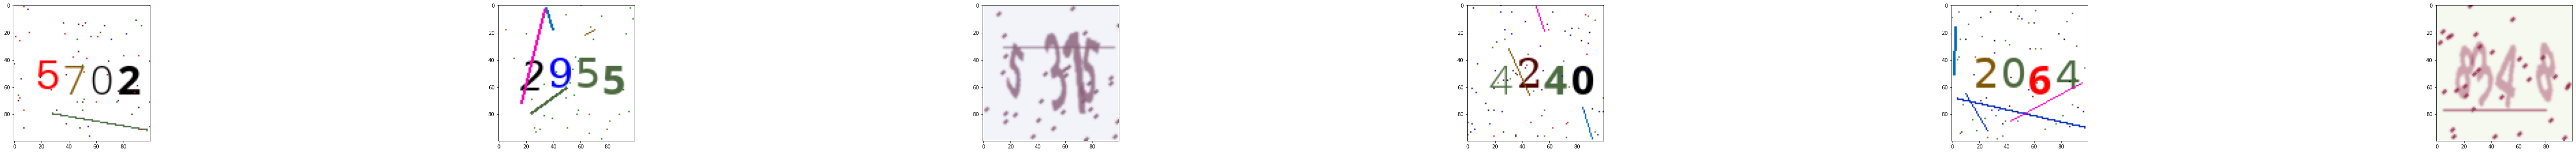

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,100))
columns = 6
for i in range(6):
    plt.subplot(len(img_list[i]) / columns + 1, columns, i + 1)
    plt.imshow(img_list[i])

---
## Train the model
Training images: 21,000
Validation images: 9,000

Total images generated: 30,000

In [8]:
os.chdir('model-generation-scripts')

In [9]:
!python3 create-captcha-solving-model.py -d test -l 4 -e 10 -b 16 -a T-NET -m captcha-solver -t captcha-solver-history

2021-10-11 22:26:48.273406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 22:26:48.279398: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 22:26:48.279761: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 22:26:48.280305: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

---
## Evaluate the model

In [10]:
os.chdir('..')

In [11]:
import pickle

# Open serialized training history data for VGG-16 model.
with open(r'captcha-solver-history', "rb") as input_file:
            history = pickle.load(input_file, encoding='bytes')

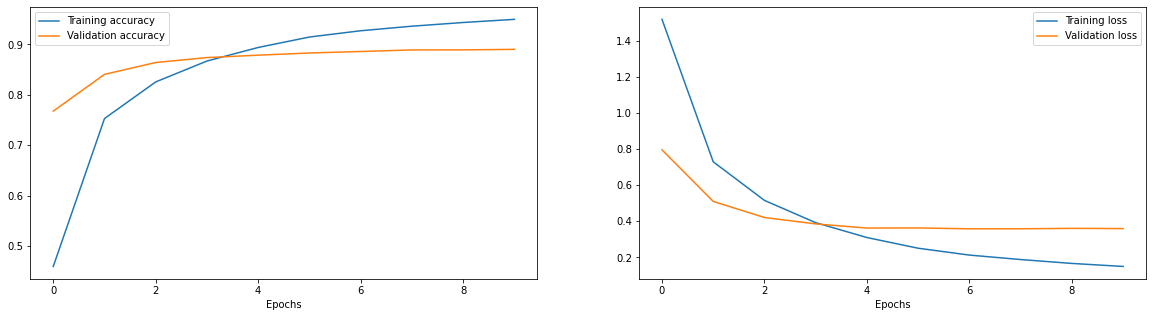

In [12]:
# Plot the training history.
figure, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].plot(history['accuracy'], label='Training accuracy')
axes[0].plot(history['val_accuracy'], label='Validation accuracy')
axes[0].set_xlabel('Epochs')
axes[0].legend() 

axes[1].plot(history['loss'], label='Training loss')
axes[1].plot(history['val_loss'], label='Validation loss')
axes[1].set_xlabel('Epochs')
axes[1].legend()

In [13]:
from tensorflow.keras import models

model = models.load_model('captcha-solver')
model.summary()

2021-10-11 22:32:32.485651: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 22:32:32.491732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 22:32:32.492093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-11 22:32:32.492827: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20000)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              20481024  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0

In [14]:
from ipynb.fs.full.shared_functions import *

In [52]:
data_frame = create_captcha_dataframe('datasets/unseen-samples')
data_frame.head()

,label,file
0,2271,datasets/unseen-samples/2271_95c10f7c-f594-4c9...
1,4580,datasets/unseen-samples/4580_9336cdb8-fafb-476...
2,4033,datasets/unseen-samples/4033_78cea4e9-a8b1-43a...
3,6787,datasets/unseen-samples/6787_c5b46f36-b6b2-47f...
4,9897,datasets/unseen-samples/9897_eaf30dc9-89d5-45d...


In [53]:
shuffled_indices = numpy.random.permutation(len(data_frame))
print('Test set:', len(shuffled_indices))

Test set: 20000


In [54]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=128)
captcha_images, captcha_text = next(testing_set_generator)

predictions = model.predict_on_batch(captcha_images)

true_values = tensorflow.math.argmax(captcha_text, axis=-1)
predictions = tensorflow.math.argmax(predictions, axis=-1)

---
## Display Results

Advantage: Since no this approach doesn't use segmentation, it's easy to mix CAPTCHA datasets and get decent results.

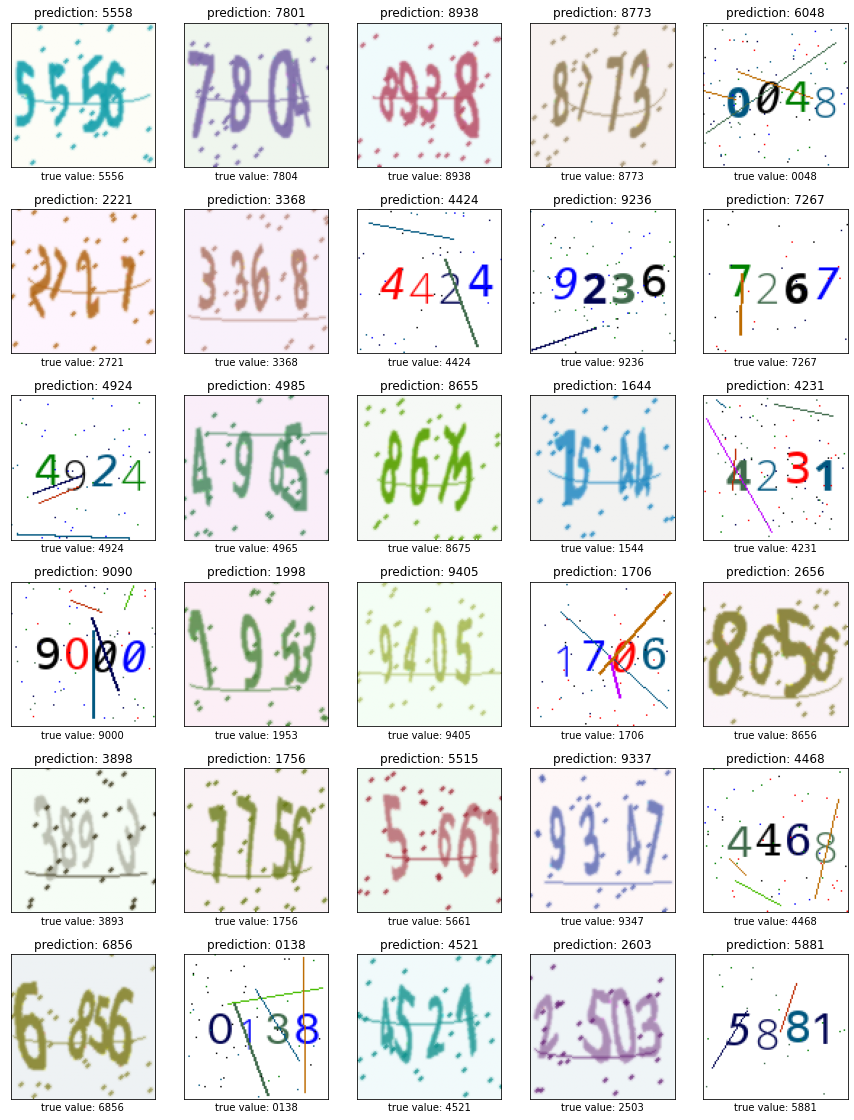

In [55]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)

---
Weakness: Due to the neural network expecting certain spatial relationships between characters, it can be fooled by samples which appear to be 'easy' to solve.

In [56]:
data_frame = create_captcha_dataframe('datasets/OpenSans-Italic')
data_frame.head()

,label,file
0,7116,datasets/OpenSans-Italic/7116_image.png
1,6604,datasets/OpenSans-Italic/6604_image.png
2,2500,datasets/OpenSans-Italic/2500_image.png
3,8836,datasets/OpenSans-Italic/8836_image.png
4,3655,datasets/OpenSans-Italic/3655_image.png


In [57]:
shuffled_indices = numpy.random.permutation(len(data_frame))
print('Test set:', len(shuffled_indices))

Test set: 6353


In [58]:
testing_set_generator = get_captcha_generator(data_frame, shuffled_indices, 
                                              for_training=False, batch_size=128)
captcha_images, captcha_text = next(testing_set_generator)

predictions = model.predict_on_batch(captcha_images)

true_values = tensorflow.math.argmax(captcha_text, axis=-1)
predictions = tensorflow.math.argmax(predictions, axis=-1)

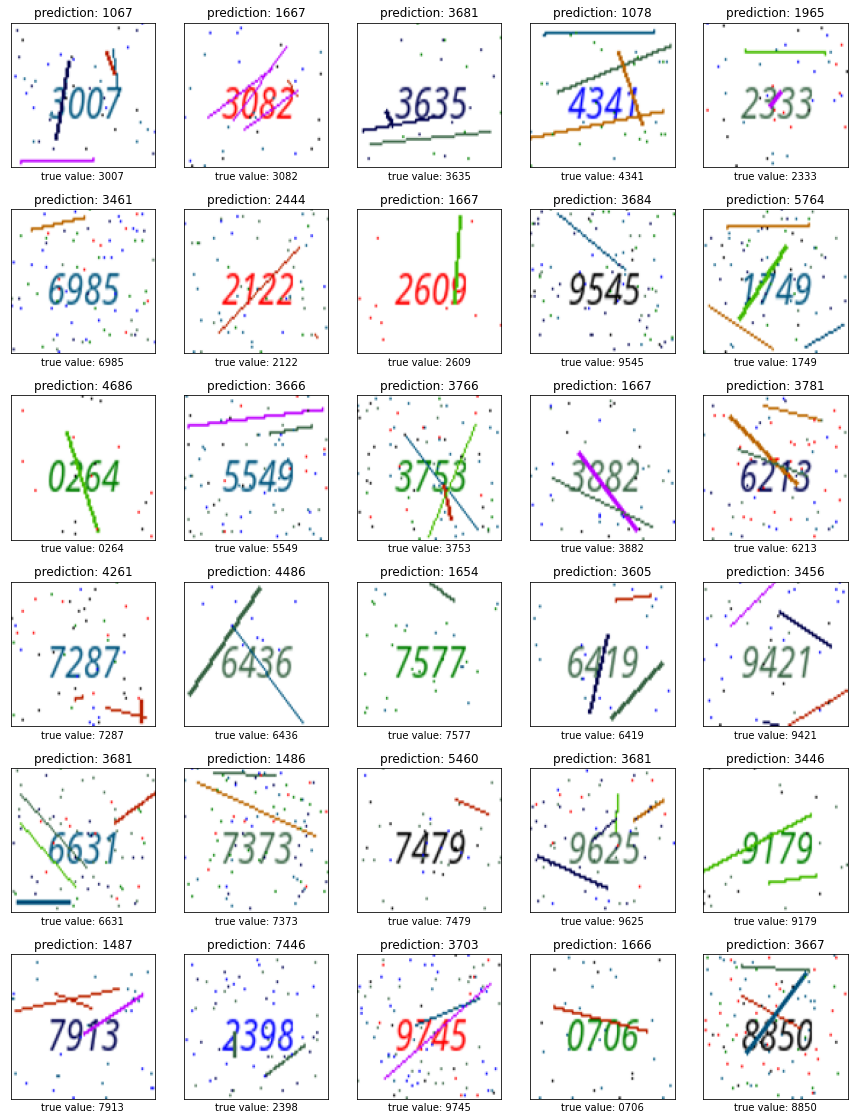

In [59]:
display_predictions_from_model(captcha_images, 
                               predictions, 
                               true_values)